## <center>Data Preprocessing for Gender Classification<center>



The notebook uses the [Simple Gender Classification]( https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification)  dataset from Kaggle, which contains demographic information (age, height, weight) and a gender label (Male / Female).

Main features:


* Gender — the gender of the individual (Male / Female)

* Age — the age of the individual in years

* Height — the height of the individual in centimeters

* Weight — the weight of the individual in kilograms

* Occupation - the occupation of the individual

* Education Level - the education level of the individual (ranging from high school diploma to doctoral degree)

* Marital Status - the marital status of the individual (either married or single)

* Income (USD) - the income of the individual in US dollars

* Favorite Color - the favorite color of the individual


###  Importing Required Libraries

In this step, we import the essential Python libraries needed for data handling and numerical operations:

- `pandas` is used for loading and manipulating datasets in tabular form.
- `numpy` provides support for numerical operations and efficient array handling.

In [1320]:
import pandas as pd
import numpy as np

###  Loading the Dataset

In this step, we load the dataset from the CSV file named `gender.csv` using the `pandas` library.  
We then display the first five rows using `head()` to get a quick overview of the dataset's structure and values.


In [1323]:
# Load the dataset from the CSV file
df = pd.read_csv('gender.csv')

# Display the first five rows of the dataset
df.head()


,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN


### Dataset Overview

We use `data.info()` to get a concise summary of the dataset.  
This includes:
- The number of entries (rows)
- Column names and data types
- Non-null counts for each column

This step helps identify missing values and understand the data structure before processing.


In [1326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Gender           131 non-null    object 
 1    Age              131 non-null    int64  
 2    Height (cm)      131 non-null    int64  
 3    Weight (kg)      131 non-null    int64  
 4    Occupation       131 non-null    object 
 5    Education Level  131 non-null    object 
 6    Marital Status   131 non-null    object 
 7    Income (USD)     131 non-null    int64  
 8    Favorite Color   131 non-null    object 
 9   Unnamed: 9        0 non-null      float64
dtypes: float64(1), int64(4), object(5)
memory usage: 10.4+ KB


### Checking for Duplicate Rows

We use `data.duplicated().sum()` to count the number of duplicate rows in the dataset.  
Removing duplicates helps ensure the model isn’t biased or learning redundant patterns.


In [1329]:
df.duplicated().sum()

1

In [1331]:
# Remove duplicate rows from the dataset in-place (modifies the original DataFrame)
df.drop_duplicates(inplace=True)

###  Cleaning Column Names

To simplify further processing, we remove spaces from the column names using `str.replace(' ', '')`.  
This ensures that column names are consistent and easier to reference in code (e.g., no need for bracket notation).


In [1334]:
# Remove spaces from column names to make them easier to work with
df.columns = df.columns.str.replace(' ', '')

# Display the updated column names
df.columns

Index(['Gender', 'Age', 'Height(cm)', 'Weight(kg)', 'Occupation',
       'EducationLevel', 'MaritalStatus', 'Income(USD)', 'FavoriteColor',
       'Unnamed:9'],
      dtype='object')

### Removing Unnecessary Columns

We drop the column `'Unnamed: 9'`, which likely appeared due to extra delimiters or formatting issues during CSV export.  
Such columns usually contain no useful data and should be removed to clean up the dataset.


In [1337]:
df.drop(['Unnamed:9'], axis=1, inplace=True)
df.head()

,Gender,Age,Height(cm),Weight(kg),Occupation,EducationLevel,MaritalStatus,Income(USD),FavoriteColor
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


### Checking for Anomalies in the Dataset

Before training a model, it's important to detect and handle potential **anomalies or outliers** in the data.  
Anomalies are unusual or extreme values that can skew the model’s performance or introduce noise.

We'll focus on detecting anomalies in **numerical features**, such as:

- `Age`
- `Height`
- `Weight`
- `Income`


###  Common Techniques for Anomaly Detection

1. **Descriptive Statistics**  
   Check min/max values, mean, and standard deviation to identify suspicious entries.
   - Example: age < 0 or > 100, weight < 30 kg, etc.

2. **Boxplot Visualization**  
   Helps identify outliers using IQR (Interquartile Range).

3. **Z-score Method**  
   Detects how many standard deviations a value is from the mean.

4. **IQR (Interquartile Range) Method**  
   Flags values that fall outside of the `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` range.



In [1340]:
# Define the list of numeric data types we want to extract
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Select only numeric columns from the DataFrame
num_df = df.select_dtypes(include=numerics)

# Display the resulting DataFrame with only numeric features
num_df

,Age,Height(cm),Weight(kg),Income(USD)
0,32,175,70,75000
1,25,182,85,45000
2,41,160,62,120000
3,38,178,79,90000
4,29,165,58,35000
...,...,...,...,...
125,43,184,85,130000
126,32,170,64,60000
128,27,162,55,55000
129,33,175,77,80000


In [1342]:
# Importing the basic plotting library
import matplotlib.pyplot as plt

# Importing seaborn for advanced statistical plots
import seaborn as sns

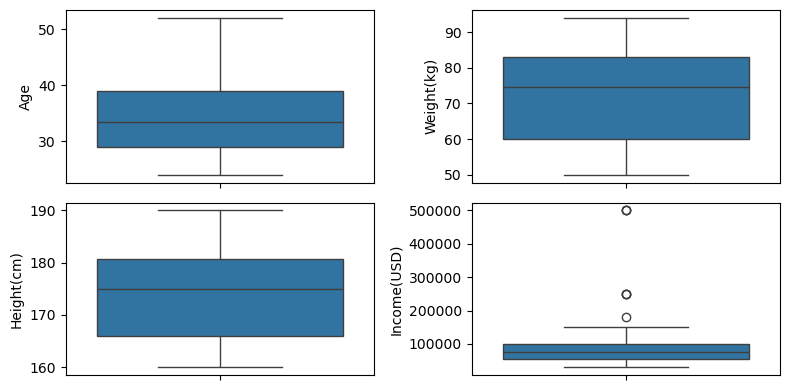

In [1344]:
# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 4))

# Plot boxplots for each numeric feature
sns.boxplot(num_df['Age'], ax=axs[0, 0])
sns.boxplot(num_df['Weight(kg)'], ax=axs[0, 1])
sns.boxplot(num_df['Height(cm)'], ax=axs[1, 0])
sns.boxplot(num_df['Income(USD)'], ax=axs[1, 1])

# Adjust layout to prevent overlap
fig.tight_layout()

###  Cleaning Categorical Text Features

We remove extra spaces from string values in categorical columns such as:
- `MaritalStatus`
- `FavoriteColor`
- `Occupation`
- `EducationLevel`

This step helps standardize the data and avoid inconsistencies like `'Single'` vs `' Single'`.

After cleaning, we extract the unique values from each column to inspect the variety of categories.  
Finally, we print the count of unique values in each cleaned categorical column.


In [1347]:
# Remove spaces from string values in categorical columns
df.MaritalStatus = df.MaritalStatus.str.replace(' ', '')
df.FavoriteColor = df.FavoriteColor.str.replace(' ', '')
df.Occupation = df.Occupation.str.replace(' ', '')
df.EducationLevel = df.EducationLevel.str.replace(' ', '')


# Get unique values from each cleaned column
unique_values_marital = df.MaritalStatus.unique()
unique_values_color = df.FavoriteColor.unique()
unique_values_occupation = df.Occupation.unique()
unique_values_education = df.EducationLevel.unique()


print('unique_values_occupation: {}, unique_values_marital: {}, unique_values_color: {}, unique_values_education: {}'.format( 
      len(unique_values_occupation), 
      len(unique_values_marital), 
      len(unique_values_color), 
      len(unique_values_education)))

unique_values_occupation: 19, unique_values_marital: 4, unique_values_color: 9, unique_values_education: 4


###  Nominal Features

**Nominal features** are categorical variables that **do not have any inherent order or ranking**.  
Examples in our dataset include: `Occupation`, `MaritalStatus`, and `FavoriteColor`.



###  Encoding Methods for Nominal Features

To use nominal features in machine learning models, we need to convert them into numerical format.  
Here are the most common encoding techniques:



####  1. **One-Hot Encoding**: `MaritalStatus`

To convert the `MaritalStatus` categorical feature into a numeric format without implying any order,  
we use **one-hot encoding**.

This creates new binary columns — one for each unique category (e.g., `Married`, `Single`, etc.):

- A value of `1` indicates the presence of that category for a given record
- A value of `0` means the category is not present

We store the resulting one-hot encoded columns in a new DataFrame called `categorical_df`.



In [1350]:
# Initialize an empty DataFrame to hold encoded categorical features
categorical_df = pd.DataFrame()

# Apply one-hot encoding to the 'MaritalStatus' column
categorical_df = pd.get_dummies(df['MaritalStatus']).astype(float)

# Display the resulting DataFrame
categorical_df.head()

,Divorced,Married,Single,Widowed
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0



####  2. Label Encoding: `FavoriteColor`

We apply **Label Encoding** to the `FavoriteColor` feature using `sklearn.preprocessing.LabelEncoder`.  
This technique assigns a unique integer to each category. For example:

- Blue → 0  
- Green → 1  
- Red → 2  
- ...

This is a compact way to handle categorical features, but keep in mind:

- Label encoding **implies an order** — so it's not ideal for models that are sensitive to ordinal relationships.
- Best used with **tree-based models** like Decision Trees, Random Forests, or XGBoost.

The encoded values are added as a new column `Color` in the `categorical_df` DataFrame.


In [1353]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to the 'FavoriteColor' column
categorical_df['Color'] = le.fit_transform(df['FavoriteColor'])

# Display the updated categorical DataFrame
categorical_df.head()

,Divorced,Married,Single,Widowed,Color
0,0.0,1.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,2
2,0.0,1.0,0.0,0.0,6
3,0.0,0.0,1.0,0.0,7
4,0.0,0.0,1.0,0.0,8


#### MinMax Scaling: `Color`

To ensure all features are on the same scale, we apply **MinMaxScaler** to the `Color` feature.  
This scales the values to a **[0, 1]** range, preserving relative distances but avoiding issues  
caused by raw integer labels.

This is especially helpful when:
- Using models that are sensitive to feature scale (e.g., SVM, KNN, logistic regression)
- Combining features with different units or magnitudes


In [1356]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Reshape required for single-column scaling
color_scaled = scaler.fit_transform(categorical_df[['Color']])

# Replace the original 'Color' column with the scaled version
categorical_df['Color'] = color_scaled

# Show the result
categorical_df.head()

,Divorced,Married,Single,Widowed,Color
0,0.0,1.0,0.0,0.0,0.125
1,0.0,0.0,1.0,0.0,0.250
2,0.0,1.0,0.0,0.0,0.750
3,0.0,0.0,1.0,0.0,0.875
4,0.0,0.0,1.0,0.0,1.000




#### 3. Frequency Encoding: `Occupation`

We use **frequency encoding** to transform the `Occupation` feature into a numerical format.

How it works:
- Each category is replaced by its **relative frequency** (i.e., how often it appears in the dataset).
- This preserves useful information while keeping the dimensionality low — especially helpful for high-cardinality features.

 Benefits:
- Memory-efficient
- Works well with many machine learning models
- Avoids dummy variable explosion from one-hot encoding

The resulting values are added to the `categorical_df` DataFrame in the `Occupation` column.


In [1359]:
# Calculate the relative frequency of each occupation category
freq = df['Occupation'].value_counts(normalize=True)

# Map the occupation column to its corresponding frequency values
categorical_df['Occupation'] = df['Occupation'].map(freq)

# Display the updated DataFrame
categorical_df.head()

,Divorced,Married,Single,Widowed,Color,Occupation
0,0.0,1.0,0.0,0.0,0.125,0.007692
1,0.0,0.0,1.0,0.0,0.250,0.053846
2,0.0,1.0,0.0,0.0,0.750,0.069231
3,0.0,0.0,1.0,0.0,0.875,0.069231
4,0.0,0.0,1.0,0.0,1.000,0.069231


###  Ordinal Features

**Ordinal features** are categorical variables that have a **natural, meaningful order or ranking** among their categories.  
An example from our dataset is:

- `EducationLevel`: e.g., HighSchool < Bachelor < Master < Doctorate


###  Encoding Methods for Ordinal Features

Since ordinal features have a logical order, it’s important to preserve this relationship during encoding.  
Here are the most appropriate methods:



#### 1. **Ordinal Encoding**
####  Manual Mapping: `EducationLevel`

We apply **manual mapping** to the `EducationLevel` feature using a dictionary.  
Since `EducationLevel` is an **ordinal** variable, this mapping reflects the inherent order of the categories:

- `Associate's Degree` → 0
- `Bachelor's Degree` → 1
- `Master's Degree` → 2
- `Doctorate Degree` → 3

This ensures that the model correctly interprets the relationships between these education levels.



In [1362]:
# Define the mapping for EducationLevel (ordinal feature)
education_mapping = {
    "Associate'sDegree": 0,
    "Bachelor'sDegree": 1,
    "Master'sDegree": 2,
    'DoctorateDegree': 3
}

# Apply the mapping to the 'EducationLevel' column
categorical_df['Education'] = df['EducationLevel'].map(education_mapping)

# Display the updated DataFrame
categorical_df.head()

,Divorced,Married,Single,Widowed,Color,Occupation,Education
0,0.0,1.0,0.0,0.0,0.125,0.007692,2
1,0.0,0.0,1.0,0.0,0.250,0.053846,1
2,0.0,1.0,0.0,0.0,0.750,0.069231,3
3,0.0,0.0,1.0,0.0,0.875,0.069231,1
4,0.0,0.0,1.0,0.0,1.000,0.069231,0


###  MinMax Scaling: Numerical Features

We apply **MinMax Scaling** to all the numerical columns in the dataset.  
This ensures that each feature is scaled to the range **[0, 1]**, which is particularly important when using algorithms that are sensitive to feature scaling (e.g., SVM, KNN, neural networks).

Scaling is applied to the following numerical features:
- `Age`
- `Weight (kg)`
- `Height (cm)`
- `Income (USD)`


In [1365]:
from sklearn.preprocessing import MinMaxScaler

# Get the list of numerical columns
num_columns = num_df.columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to each numerical column and update the categorical_df with the scaled values
for i in num_columns:
    num_scaled = scaler.fit_transform(num_df[[i]])  # Scale the column
    categorical_df[i] = num_scaled  # Replace the original column with the scaled values

# Show the updated DataFrame
categorical_df.head()

,Divorced,Married,Single,Widowed,Color,Occupation,Education,Age,Height(cm),Weight(kg),Income(USD)
0,0.0,1.0,0.0,0.0,0.125,0.007692,2,0.285714,0.500000,0.454545,0.095745
1,0.0,0.0,1.0,0.0,0.250,0.053846,1,0.035714,0.733333,0.795455,0.031915
2,0.0,1.0,0.0,0.0,0.750,0.069231,3,0.607143,0.000000,0.272727,0.191489
3,0.0,0.0,1.0,0.0,0.875,0.069231,1,0.500000,0.600000,0.659091,0.127660
4,0.0,0.0,1.0,0.0,1.000,0.069231,0,0.178571,0.166667,0.181818,0.010638


###  Gender Encoding

We transform the `Gender` feature into numerical values:
- `Male` → 1
- `Female` → 0

This encoding allows us to use the `Gender` feature in machine learning models that require numerical inputs.


###  Cleaning the `Gender` Column

We remove any leading or trailing spaces from the `Gender` feature using the `str.replace()` method.  
This ensures the `Gender` column is clean and ready for encoding without any unwanted spaces that could affect the transformation or model performance.


In [1368]:
categorical_df['Gender'] = df.Gender.str.replace(' ', '')
categorical_df.head()

,Divorced,Married,Single,Widowed,Color,Occupation,Education,Age,Height(cm),Weight(kg),Income(USD),Gender
0,0.0,1.0,0.0,0.0,0.125,0.007692,2,0.285714,0.500000,0.454545,0.095745,male
1,0.0,0.0,1.0,0.0,0.250,0.053846,1,0.035714,0.733333,0.795455,0.031915,male
2,0.0,1.0,0.0,0.0,0.750,0.069231,3,0.607143,0.000000,0.272727,0.191489,female
3,0.0,0.0,1.0,0.0,0.875,0.069231,1,0.500000,0.600000,0.659091,0.127660,male
4,0.0,0.0,1.0,0.0,1.000,0.069231,0,0.178571,0.166667,0.181818,0.010638,female


In [1370]:
# Map Gender categories to numerical values
gender_mapping = {
    "male": 1,
    "female": 0
}

# Apply the mapping to the 'Gender' column
categorical_df['Gender'] = categorical_df['Gender'].map(gender_mapping)

# Show the updated DataFrame
categorical_df.head()

,Divorced,Married,Single,Widowed,Color,Occupation,Education,Age,Height(cm),Weight(kg),Income(USD),Gender
0,0.0,1.0,0.0,0.0,0.125,0.007692,2,0.285714,0.500000,0.454545,0.095745,1
1,0.0,0.0,1.0,0.0,0.250,0.053846,1,0.035714,0.733333,0.795455,0.031915,1
2,0.0,1.0,0.0,0.0,0.750,0.069231,3,0.607143,0.000000,0.272727,0.191489,0
3,0.0,0.0,1.0,0.0,0.875,0.069231,1,0.500000,0.600000,0.659091,0.127660,1
4,0.0,0.0,1.0,0.0,1.000,0.069231,0,0.178571,0.166667,0.181818,0.010638,0


###  Saving Preprocessed Data

We save the preprocessed DataFrame into two formats:
- **CSV** for easy access and further processing in other tools
- **Pickle** for efficient storage and fast loading back into Python

This ensures that the data is ready for training the model at any time without the need for repeated preprocessing.


In [1374]:
# Saving the DataFrame as a CSV file
categorical_df.to_csv('preprocessed_data.csv', index=False)

--------
# Author Information

**Author**: Alisa Feofanova  
**Date**: 16.04.2025  
**Project Title**: Gender Classification Dataset Preprocessing

### 📝 Project Description:
This notebook is dedicated to the preprocessing of the **Simple Gender Classification** dataset, which contains demographic data such as age, height, weight, occupation, and more. The goal of this notebook is to clean and transform the data, including handling missing values, encoding categorical features, and scaling numerical features for further use in machine learning models.

### 🔧 Tools & Libraries Used:
- **Pandas**: Data manipulation and analysis
- **NumPy**: Support for large, multi-dimensional arrays and matrices
- **Scikit-learn**: For preprocessing (scaling, encoding)
- **Matplotlib & Seaborn**: Visualization
